<a href="https://colab.research.google.com/github/karasu1982/DataVisualization/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境設定

In [1]:
# 標準ライブラリ
import pandas as pd
import numpy as np

# データ見える化
import seaborn as sns
import matplotlib.pyplot as plt

# データ準備

## データ準備

ID-POSのサンプルデータとして、下記を利用

https://www.kyoritsu-pub.co.jp/book/b10003634.html

In [4]:
!wget https://kyoritsu-pub.sakura.ne.jp/app/file/goods_contents/2319.zip
!unzip /content/2319.zip
!unzip /content/DataProcess.20151001/src/data/Tafeng/Tafeng.zip

In [5]:
df = pd.read_csv("/content/Tafeng_dataset/Tafeng.csv")

In [6]:
df.head(3)

,Time,CustID,Age,Area,ProductSubClass,ProductID,Amount,Asset,SalesPrice
0,2000-11-01 00:00:00,46855,D,E,110411,4710085120468,3,51,57
1,2000-11-01 00:00:00,539166,E,E,130315,4714981010038,2,56,48
2,2000-11-01 00:00:00,663373,F,E,110217,4710265847666,1,180,135


# 関数定義

In [7]:
# 列ごとの基準統計量

df.describe()

,CustID,ProductSubClass,ProductID,Amount,Asset,SalesPrice
count,8.177410e+05,817741.000000,8.177410e+05,817741.000000,817741.000000,817741.000000
mean,1.406620e+06,284950.495933,4.461639e+12,1.381781,112.109848,131.875589
std,7.489784e+05,226390.701451,1.690093e+12,2.897473,603.661776,631.057633
min,1.069000e+03,100101.000000,2.000882e+07,1.000000,0.000000,1.000000
25%,9.692220e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.587722e+06,130106.000000,4.710421e+12,1.000000,62.000000,76.000000
75%,1.854930e+06,520314.000000,4.712500e+12,1.000000,112.000000,132.000000
max,2.000200e+07,780510.000000,9.789580e+12,1200.000000,432000.000000,444000.000000


In [10]:
# 列ごとのNull値数
## Null値が20%以上の項目は使わないケースが多い

df.isnull().sum()

Time               0
CustID             0
Age                0
Area               0
ProductSubClass    0
ProductID          0
Amount             0
Asset              0
SalesPrice         0
dtype: int64

In [27]:
_df = df[["Group","Asset","SalesPrice"]].groupby("Asset").sum()
_df = _df.reset_index()
_df["Group"] = _df["Asset"].apply(lambda x: "Under" if x<=10000 else "Over")

In [28]:
_df

,Asset,SalesPrice,Group
0,0,3337,Under
1,2,282,Under
2,3,222,Under
3,4,949,Under
4,5,7791,Under
...,...,...,...
1723,47069,46855,Over
1724,49403,49172,Over
1725,60768,125376,Over
1726,67872,141178,Over


<Figure size 720x576 with 0 Axes>

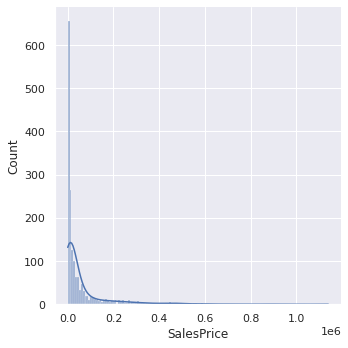

In [29]:
# ヒストグラム

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.displot(_df.SalesPrice, kde=True) # binsを指定することで、何階層に分けるか

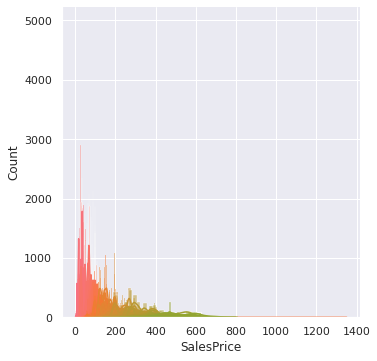

In [30]:
# ヒストグラム（２つ重ねて比較）
sns.FacetGrid(data=df, hue="Asset", height=5).\
map(sns.histplot,"SalesPrice", kde=True).\
add_legend()

In [ ]:
# ヒストグラム（横に並べて比較）
sns.FacetGrid(data=df, col="Asset", height=5).\
map(sns.histplot,"SalesPrice").\
add_legend()

In [ ]:
# 棒グラフ
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.barplot(data=df,x="Asset",y="SalesPrice") #更に、hueで横軸を増やすことが可能

In [ ]:
# 散布図
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="hinkon",y="shugyo", hue="area")

In [ ]:
# 相関係数
df.corr()["hinkon"]["shugyo"]

In [ ]:
# 箱ひげ図
## 四分位範囲から外れ値を発見

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(data=df, x="area", y="shugyo") #更に、hueで横軸を増やすことが可能

In [ ]:
# バイオリン図
## 四分位範囲から外れ値を発見

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(data=df, x="area", y="shugyo") #更に、hueで横軸を増やすことが可能、split=Trueにするとhueで左右比較も可能

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.heatmap(df.corr()) # annot=True にすると、値が表示される（項目が多いときは利用NG

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.heatmap(df[["hinkon","shugyo","hiseiki","yakuin"]].corr(), annot=True)